In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-document-classification-dataset/df_file.csv


In [186]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import re

from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
import math
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Flatten, Dense, GlobalAveragePooling1D, Reshape, BatchNormalization,  LSTM, GRU, Dropout


In [187]:
import nltk
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

In [188]:
df = pd.read_csv("/kaggle/input/text-document-classification-dataset/df_file.csv")
labels_and_their_relation = {"0" : "Politics","1" : "Sport", "2" : "Technology", "3" : "Entertainment", "4" : "Business"}

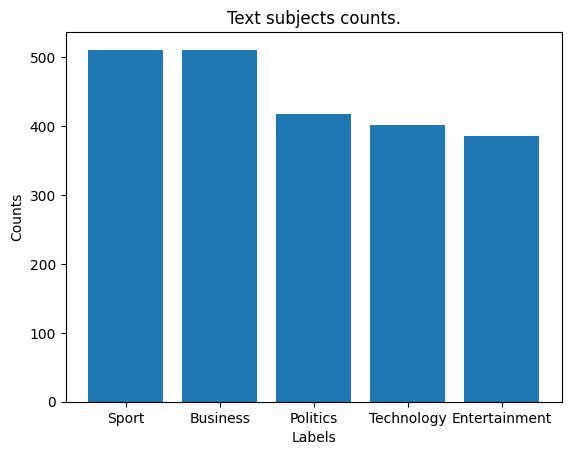

In [189]:
counts = {}
for key in labels_and_their_relation:
    counts[labels_and_their_relation[key]] = len(df[df["Label"]==int(key)])
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Text subjects counts.")
plt.bar(counts.keys(), counts.values())
plt.show()

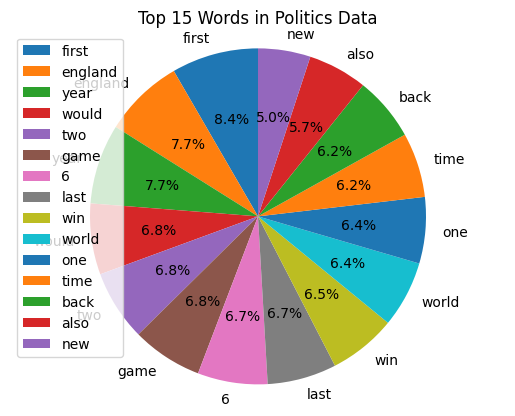

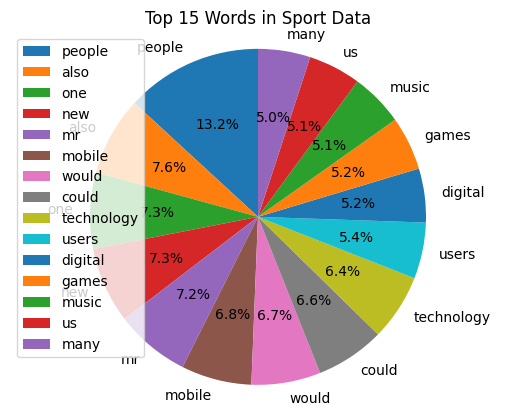

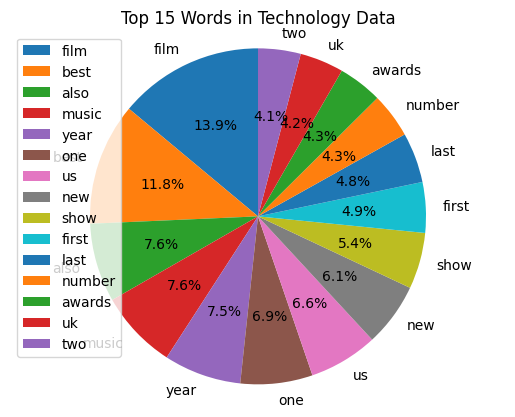

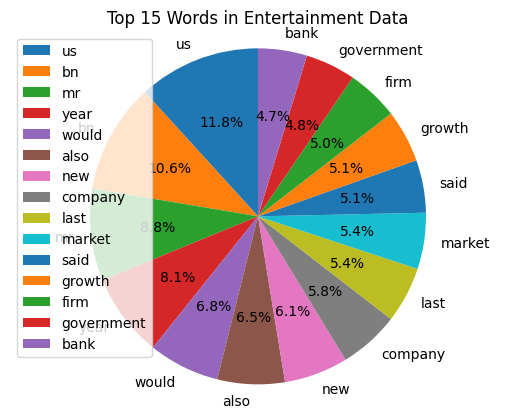

In [190]:
list_of_dics = []
for i in range(1, 5, 1):
    dic = Counter()

    words_to_clean_up = set([".", "s", "said"])

    for index, text in df[df["Label"] == i].iterrows():
        cleaned_text = re.sub(r"(?<=\d)\s*(?!\d)|[^A-Za-z0-9£.]", ' ', text["Text"])
        cleaned_text = cleaned_text.lower()
        cleaned_text = re.sub(r'[ \t\n]+', ' ', cleaned_text)
        split_text = cleaned_text.split()
        cleaned_words = [word if word != "said." else "said" for word in split_text if word not in stop_words and word not in words_to_clean_up]

        dic.update(cleaned_words)
    top_n = 15
    top_words = dict(dic.most_common(top_n))

    fig, ax = plt.subplots()
    ax.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title(f'Top {top_n} Words in {list(labels_and_their_relation.values())[i-1]} Data')
    plt.legend(top_words.keys())
    plt.show()
    list_of_dics.append(dic)



In [191]:
X_test, X_train, y_train, y_test= train_test_split(df["Text"], df["Label"], train_size=0.8, random_state=42)
rows = []
words_to_clean_up = set([".", "s", "said"])
stop_words = set(stopwords.words('english'))

for text in X_train:
    cleaned_text = re.sub(r"(?<=\d)\s*(?!\d)|[^A-Za-z0-9£.]", ' ', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r'[ \t\n]+', ' ', cleaned_text)
    split_text = cleaned_text.split()
    cleaned_words = [word if word != "said." else "said" for word in split_text if word not in stop_words and word not in words_to_clean_up]
    rows.append(cleaned_words)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Label"], train_size=0.8, shuffle=True)

words_to_clean_up = set([".", "s", "said"])
stop_words = set(stopwords.words('english'))

training_df = pd.DataFrame({"text": X_train, "label": y_train})

rows = []
df_dict = defaultdict(int)
for index, row in training_df.iterrows():
    cleaned_text = re.sub(r"(?<=\d)\s*(?!\d)|[^A-Za-z0-9£.]", ' ', row["text"])
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r'[ \t\n]+', ' ', cleaned_text)
    split_text = cleaned_text.split()
    cleaned_words = [word if word != "said." else "said" for word in split_text if word not in stop_words and word not in words_to_clean_up]
    
    rows.append(" ".join(str(x) for x in cleaned_words))
training_df["text"] = rows
tfidf_vectorizer = TfidfVectorizer(max_features=200)
X_train_tfidf = tfidf_vectorizer.fit_transform(training_df["text"]).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
count_vectorizer = CountVectorizer(max_features=200)
X_train_bow = count_vectorizer.fit_transform(X_train).toarray()
X_test_bow = count_vectorizer.transform(X_test).toarray()

from sklearn.preprocessing import MinMaxScaler

# Scale the values to a larger range
scaler = MinMaxScaler(feature_range=(0, 100))  # Adjust the range as needed
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Convert to integers after scaling
X_train_scaled_int = X_train_scaled.astype(int)
X_test_scaled_int = X_test_scaled.astype(int)

# Pad sequences
X_train_padded = pad_sequences(X_train_scaled_int, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_scaled_int, maxlen=max_sequence_length, padding='post')

# Rest of your code...
y_train_one_hot = to_categorical(y_train, num_classes=5)
y_test_one_hot = to_categorical(y_test, num_classes=5)

y_test_one_hot = to_categorical(y_test, num_classes=5)

In [193]:
X_train_padded[0][1]

0

In [194]:
print(X_train_padded[0][0])
model = Sequential()
model.add(Dense(512, input_dim=2000, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(258, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(X_train_padded.shape)
print(y_train_one_hot.shape)


model.fit(X_train_padded, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

40
(1780, 2000)
(1780, 5)
Epoch 1/50
45/45 [==============================] - 2s 11ms/step - loss: 1.2933 - accuracy: 0.4522 - val_loss: 0.5102 - val_accuracy: 0.8596
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.5438 - accuracy: 0.8160 - val_loss: 0.2646 - val_accuracy: 0.9382
Epoch 3/50
45/45 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.9213 - val_loss: 0.2753 - val_accuracy: 0.9185
Epoch 4/50
45/45 [==============================] - 0s 8ms/step - loss: 0.1539 - accuracy: 0.9572 - val_loss: 0.2973 - val_accuracy: 0.9354
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.2975 - val_accuracy: 0.9213
Epoch 6/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1415 - accuracy: 0.9551 - val_loss: 0.2722 - val_accuracy: 0.9354
Epoch 7/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0891 - accuracy: 0.9726 - val_loss: 0.2723 - val_accuracy: 

In [195]:
predicted = model.predict(X_test_padded, verbose="auto")
predicted = np.round(predicted, decimals=1)
indices = np.argmax(predicted, axis=1)

14/14 [==============================] - 0s 2ms/step


In [196]:
y_test = list(y_test)
predictions = []
for i in range(len(y_test)):
    predictions.append(indices[i] == y_test[i])
print(predictions.count(True)/len(y_test))

0.903370786516854
